In [44]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)

Warning message:
"package 'psych' was built under R version 4.0.3"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [17]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
summary(df.wa)
colnames(df.wa)
str(df.wa)
head(df.wa, 7)

   Country               ptap             bore             pspr       
 Length:78          Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.000  
 Mode  :character   Median :10.300   Median : 3.900   Median : 0.550  
                    Mean   :11.755   Mean   :12.571   Mean   : 3.128  
                    3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 3.675  
                    Max.   :57.700   Max.   :86.400   Max.   :47.900  
      uspr             pwel             uwel             surw       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 0.525   1st Qu.: 0.425   1st Qu.: 1.200  
 Median : 1.050   Median : 3.950   Median : 3.750   Median : 4.100  
 Mean   : 3.640   Mean   : 6.314   Mean   : 6.821   Mean   : 5.124  
 3rd Qu.: 2.775   3rd Qu.: 8.825   3rd Qu.:10.425   3rd Qu.: 7.525  
 Max.   :36.300   Max.   :48.100   Max.   :33.000   Max.   :19.200  
      tles          

[1] "Country" "ptap"    "bore"    "pspr"    "uspr"    "pwel"    "uwel"   
 [8] "surw"    "tles"    "tmor"    "rain"    "phom"    "imws"    "pipy"   
[15] "truc"    "ctan"    "bott"    "uiws"    "othw"    "iwsp"    "basw"   
[22] "liws"    "watp"

tibble [78 x 23] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:78] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ ptap   : num [1:78] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 0 18.4 ...
 $ bore   : num [1:78] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 0 40.6 ...
 $ pspr   : num [1:78] 4.7 2.5 3.3 1 7.5 0 0.3 0 0 0.2 ...
 $ uspr   : num [1:78] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 0 1.5 ...
 $ pwel   : num [1:78] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 0 9 ...
 $ uwel   : num [1:78] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 0 16.3 ...
 $ surw   : num [1:78] 7.3 0 18 0 7 1.2 5.8 5.2 0 0.8 ...
 $ tles   : num [1:78] 45.2 20.6 46.1 1.6 18.7 22.7 49.8 11.2 0 49.8 ...
 $ tmor   : num [1:78] 8.2 1.1 15.6 0.1 4.4 1.6 12.1 0.7 0 32.6 ...
 $ rain   : num [1:78] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ phom   : num [1:78] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 69.2 2.6 ...
 $ imws   : num [1:78] 71.2 98.4 66.9 99.9 90.6 97.8 71.7 87.3 76 80.9 ...
 $ pipy   : num [1:78] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 3.5 9.6 ...
 $ truc   : num [1:78] 1.5 14.1 9

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5
Benin,13.0,28.9,0.3,1.2,4.4,20.8,5.8,49.8,12.1,...,4.2,0.2,0.3,0.0,28.3,0.4,29.6,64.0,7.3,37.4


The goal of this study is to analyze the characteristics of the water accessibility variables.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.5545745 1.5169601 1.33879378 1.30098955 1.19651265
Proportion of Variance 0.2966296 0.1045985 0.08147131 0.07693517 0.06507466
Cumulative Proportion  0.2966296 0.4012281 0.48269943 0.55963460 0.62470926
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.18120970 1.06219269 1.00724046 0.92978320 0.89052132
Proportion of Variance 0.06342074 0.05128424 0.04611515 0.03929531 0.03604674
Cumulative Proportion  0.68813000 0.73941424 0.78552940 0.82482471 0.86087144
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.84536550 0.72437372 0.66273386 0.63266944 0.60076161
Proportion of Variance 0.03248377 0.02385079 0.01996437 0.01819412 0.01640521
Cumulative Proportion  0.89335521 0.91720599 0.93717036 0.95536448 0.97176969
                          Comp.16     Comp.17 


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
ptap  0.180  0.376  0.153  0.255                0.271                      
bore         0.152 -0.557                0.197 -0.229        -0.244 -0.341 
pspr  0.122  0.255  0.269 -0.295 -0.393               -0.224               
uspr  0.209         0.279 -0.363                      -0.207 -0.114        
pwel  0.143 -0.103 -0.344               -0.313  0.306 -0.297  0.109        
uwel  0.208        -0.271  0.161  0.241 -0.175         0.214         0.493 
surw  0.201         0.151 -0.205  0.426        -0.115 -0.166        -0.279 
tles  0.297  0.266                0.214  0.111               -0.177        
tmor  0.295  0.243               -0.111 -0.268         0.245         0.110 
rain        -0.177        -0.316         0.145  0.254  0.648        -0.234 
phom -0.248 -0.129  0.134  0.278 -0.202 -0.137 -0.235 -0.214 -0.177  0.197 
imws -0.258  0.316 -0.198        -0.156         0.168               -0.156 
p

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
1.4267305,-0.427672110,-0.495034608,-1.09882686,1.68909918,-1.99223923,1.7370609,-1.257469210,-1.58191505,-0.25893829,...,0.42738106,-0.77303538,0.5209875058,0.84051414,-0.030500665,0.389797932,-0.142486034,0.108249102,-0.015936613,0.059673587
-3.5088718,0.281825887,0.360488977,0.18354132,-0.28098199,-2.69127058,-1.9250677,-0.111949218,1.64296460,-1.28497647,...,-0.07150078,-0.95942893,0.7486569758,-1.08138312,-0.339091311,-0.769539087,0.012326940,0.368079660,-0.102774021,-0.087308692
1.7952348,-0.777975232,1.349849957,-1.02782045,2.81636002,-3.45659405,0.6256211,-0.490166454,-0.38576057,-1.86921290,...,1.00569421,0.41132085,-0.2607123137,-0.12047886,0.198515540,-0.309529189,-0.012813120,-0.058666457,-0.012408917,-0.099896768
-4.4017036,0.114596246,0.361233065,0.93578553,-0.92271609,-0.07041174,-1.5281745,-0.924730657,0.06439318,0.63747045,...,1.11279447,0.15261669,0.1414629011,0.71982499,-0.217540517,-0.260316451,0.023726760,0.018350364,-0.072568470,-0.034146310
-2.0508988,0.505375745,1.099512379,0.47447107,0.59326861,-1.76685274,-0.7870105,-0.502659144,0.50478829,-1.94916149,...,-0.06511625,-0.64043671,-0.5056031965,-0.32521911,0.054374250,-0.258186010,-0.006299988,0.149501060,-0.032281175,-0.016457009
-2.0437455,1.258782018,-3.202158724,-0.41458686,0.23433923,1.70268475,-1.6404682,0.085047522,-1.11494314,-1.64887299,...,-0.05339075,-0.60094710,0.3058909114,0.13183009,0.216469905,1.069193142,0.293682832,0.117493336,-0.005178543,-0.062886518
1.6269557,0.007620627,-1.288206642,0.43572244,0.72578696,0.30895687,-0.5468868,0.635250288,-0.41509784,0.66198355,...,0.35907402,-0.41536367,-0.3131049104,-0.22152592,0.178743121,0.043046343,-0.094165929,-0.237080001,0.062052263,0.017438821
-2.7304022,0.697779447,1.544418465,1.62573738,1.67535249,0.99751229,1.0155379,-0.217329792,1.06840960,-0.20800285,...,-0.55240834,-0.23759644,-0.8445601494,-0.56250885,0.202659700,-0.355349377,0.101203988,-0.044837812,0.030276874,-0.057458560
-0.6394664,-3.661774631,1.167937633,2.04177473,-2.14637789,-0.16696720,0.2071313,-0.213727756,-2.42373008,-0.13860833,...,0.15341873,0.48725515,-0.1545119162,-0.98250713,-0.334655855,0.053830475,0.008181981,-0.066090753,-0.055309582,0.039400137
3.1690100,1.894272646,-1.945531667,1.04653349,-1.22130724,-0.86693715,0.1059415,1.803630766,-0.34750690,0.34354129,...,-0.03562086,1.10215260,-0.0001633723,0.09291906,-0.111973870,-0.152618637,-0.705840386,0.217364102,0.155370773,-0.093167051


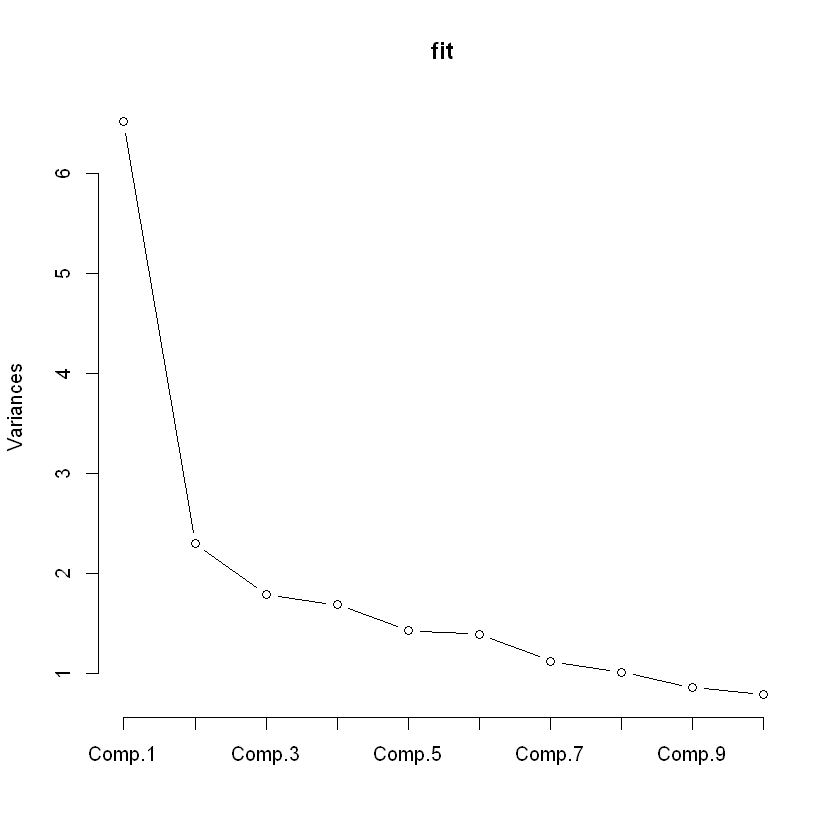

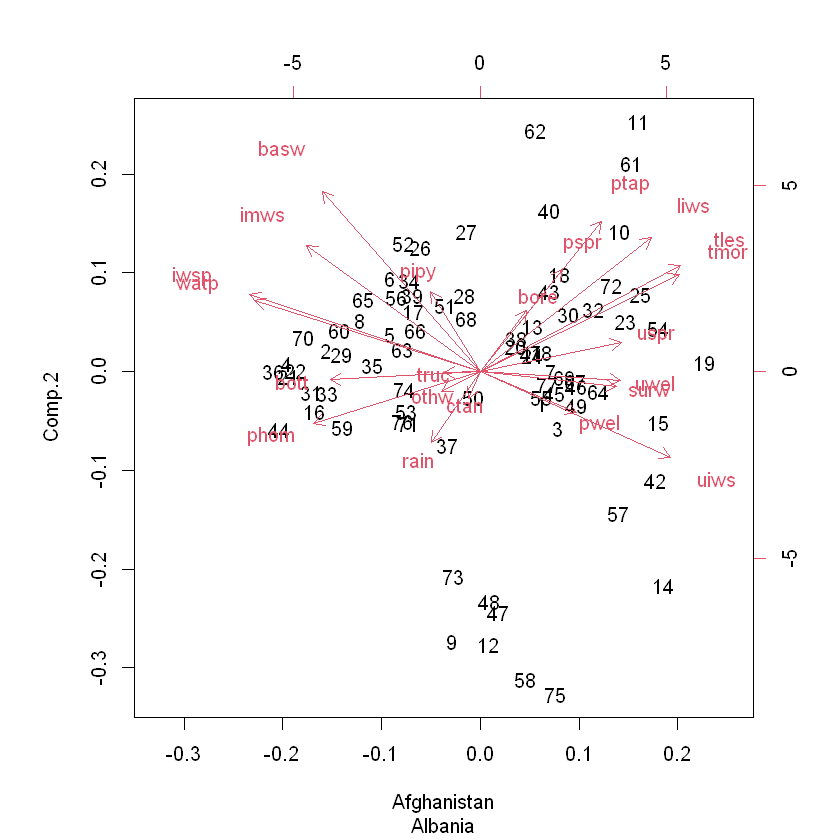

In [41]:
fit <- princomp(df.wa[,c(2:23)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot
fit$scores # the principal components
biplot(fit )

In [47]:
# Varimax Rotated Principal Components
# retaining 7 components
fit <- principal(df.wa[,c(2:23)], nfactors=7, rotate="varimax")
fit # print results

Principal Components Analysis
Call: principal(r = df.wa[, c(2:23)], nfactors = 7, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1   RC5   RC2   RC4   RC3   RC6   RC7   h2    u2 com
ptap -0.11  0.04  0.42  0.39 -0.01  0.67 -0.01 0.78 0.219 2.5
bore  0.06 -0.03 -0.11  0.30 -0.80 -0.12  0.09 0.77 0.228 1.4
pspr -0.02  0.01  0.84 -0.15  0.02  0.01 -0.11 0.75 0.251 1.1
uspr -0.11  0.50  0.62 -0.15 -0.04 -0.05 -0.06 0.68 0.321 2.2
pwel -0.46 -0.13 -0.01  0.22 -0.11 -0.09  0.57 0.62 0.380 2.5
uwel -0.32  0.24 -0.09  0.50 -0.20  0.01  0.36 0.59 0.414 3.6
surw -0.03  0.79  0.10  0.06 -0.07  0.05  0.13 0.66 0.342 1.1
tles -0.13  0.49  0.40  0.40 -0.43  0.26  0.12 0.84 0.156 4.8
tmor -0.25  0.24  0.68  0.49 -0.06 -0.01  0.14 0.84 0.161 2.6
rain -0.02  0.01 -0.03 -0.61 -0.02 -0.03  0.10 0.39 0.612 1.1
phom  0.18 -0.44 -0.32  0.01  0.47 -0.25 -0.38 0.75 0.251 4.7
imws  0.53 -0.71  0.00 -0.03 -0.08  0.10  0.12 0.81 0.188 2.0
pipy  0.20 -0.02 -0.14 